### Imports

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from sklearn.model_selection import train_test_split #  KFold, GridSearchCV,

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

import powerlaw

### Data Ingest

In [4]:
df = pd.read_csv('../INSERT_PATH/training.csv')
print(df.shape) # (250000, 33)
print(df.columns)
df.head(2)

(250000, 33)
Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b


### Data Preparation for ML

In [5]:
df_X = df[['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 
           'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
           'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
           'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
           'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
           'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
           'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
           'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
           'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'
          ]]

In [6]:
le = preprocessing.LabelEncoder()
le.fit(df['Label'])
y = le.transform(df['Label'])
df_y = pd.DataFrame({'Label': le.transform(df['Label'])})
df_y['Label'].value_counts()

0    164333
1     85667
Name: Label, dtype: int64

In [7]:
df['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)  # random_state=0
print(X_train.shape, X_test.shape)

(200000, 30) (50000, 30)


### Create data subsets for scaling experiments

In [9]:
X_train_100 = X_train.head(100)
y_train_100 = y_train.head(100)

X_train_200 = X_train.head(200)
y_train_200 = y_train.head(200)

X_train_300 = X_train.head(300)
y_train_300 = y_train.head(300)

X_train_1000 = X_train.head(1000)
y_train_1000 = y_train.head(1000)

X_train_2000 = X_train.head(2000)
y_train_2000 = y_train.head(2000)

X_train_3000 = X_train.head(3000)
y_train_3000 = y_train.head(3000)

X_train_5000 = X_train.head(5000)
y_train_5000 = y_train.head(5000)

X_train_10000 = X_train.head(10000)
y_train_10000 = y_train.head(10000)

X_train_20000 = X_train.head(20000)
y_train_20000 = y_train.head(20000)

X_train_100000 = X_train.head(100000)
y_train_100000 = y_train.head(100000)

X_train_125000 = X_train.head(125000)
y_train_125000 = y_train.head(125000)

X_train_150000 = X_train.head(150000)
y_train_150000 = y_train.head(150000)

X_train_200000 = X_train.head(200000)
y_train_200000 = y_train.head(200000)

### Scaling experiment

In [10]:
def score_xgb_clf(X_train, y_train, X_test, y_test):
    '''
    '''
    clf_xgb = []
    clf_xgb = xgb.sklearn.XGBClassifier()
    clf_xgb.fit(X_train, y_train)
    clf_xgb_score = clf_xgb.score(X_test, y_test)
    # xgboost score(): Return the mean accuracy on the given test data and labels.
    
    return clf_xgb_score

In [11]:
score_100 = score_xgb_clf(X_train_100, y_train_100, X_test, y_test)

score_200 = score_xgb_clf(X_train_200, y_train_200, X_test, y_test)

score_300 = score_xgb_clf(X_train_300, y_train_300, X_test, y_test)

score_1000 = score_xgb_clf(X_train_1000, y_train_1000, X_test, y_test)

score_2000 = score_xgb_clf(X_train_3000, y_train_3000, X_test, y_test)

score_3000 = score_xgb_clf(X_train_3000, y_train_3000, X_test, y_test)

score_5000 = score_xgb_clf(X_train_5000, y_train_5000, X_test, y_test)

score_10000 = score_xgb_clf(X_train_10000, y_train_10000, X_test, y_test)

score_20000 = score_xgb_clf(X_train_20000, y_train_20000, X_test, y_test)

score_100000 = score_xgb_clf(X_train_100000, y_train_100000, X_test, y_test)

#score_125000 = score_xgb_clf(X_train_125000, y_train_125000, X_test, y_test)

#score_150000 = score_xgb_clf(X_train_150000, y_train_150000, X_test, y_test)

score_200000 = score_xgb_clf(X_train_200000, y_train_200000, X_test, y_test)

dict_scale = {100: score_100,
              200: score_200,
              300: score_300,
              1000: score_1000,
              2000: score_2000,
              3000:score_3000 ,
              5000: score_5000,
              10000: score_10000,
              20000: score_20000,
              100000: score_100000,
              #125000: score_125000,
              #150000: score_150000,
              200000: score_200000
             }

C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

[23:13:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(la

[23:13:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

[23:13:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

[23:13:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

[23:13:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

[23:13:49] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

[23:13:51] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

[23:13:54] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

[23:14:07] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
#dict_scale = {100: score_100,
#              200: score_200,
#              300: score_300,
#              1000: score_1000,
#              2000: score_2000,
#              3000:score_3000 ,
#              5000: score_5000,
#              10000: score_10000,
#              20000: score_20000,
#              100000: score_100000,
#              #125000: score_125000,
#              #150000: score_150000,
#              200000: score_200000
#             }

In [12]:
def score_tree_clf(X_train, y_train, X_test, y_test):
    '''
    '''
    clf_tree = []
    clf_tree = DecisionTreeClassifier()
    clf_tree.fit(X_train, y_train)
    clf_tree_score = clf_tree.score(X_test, y_test)
    # xgboost score(): Return the mean accuracy on the given test data and labels.
    
    return clf_tree_score

In [13]:
score_100 = score_tree_clf(X_train_100, y_train_100, X_test, y_test)

score_200 = score_tree_clf(X_train_200, y_train_200, X_test, y_test)

score_300 = score_tree_clf(X_train_300, y_train_300, X_test, y_test)

score_1000 = score_tree_clf(X_train_1000, y_train_1000, X_test, y_test)

score_2000 = score_tree_clf(X_train_3000, y_train_3000, X_test, y_test)

score_3000 = score_tree_clf(X_train_3000, y_train_3000, X_test, y_test)

score_5000 = score_tree_clf(X_train_5000, y_train_5000, X_test, y_test)

score_10000 = score_tree_clf(X_train_10000, y_train_10000, X_test, y_test)

score_20000 = score_tree_clf(X_train_20000, y_train_20000, X_test, y_test)

score_100000 = score_tree_clf(X_train_100000, y_train_100000, X_test, y_test)

#score_125000 = score_tree_clf(X_train_125000, y_train_125000, X_test, y_test)

#score_150000 = score_tree_clf(X_train_150000, y_train_150000, X_test, y_test)

score_200000 = score_tree_clf(X_train_200000, y_train_200000, X_test, y_test)

dict_scale = {100: score_100,
              200: score_200,
              300: score_300,
              1000: score_1000,
              2000: score_2000,
              3000:score_3000 ,
              5000: score_5000,
              10000: score_10000,
              20000: score_20000,
              100000: score_100000,
              #125000: score_125000,
              #150000: score_150000,
              200000: score_200000
             }

In [14]:
def score_lr_clf(X_train, y_train, X_test, y_test):
    '''
    '''
    clf_lr = []
    clf_lr = LogisticRegression()
    clf_lr.fit(X_train, y_train)
    clf_lr_score = clf_lr.score(X_test, y_test)
    # xgboost score(): Return the mean accuracy on the given test data and labels.
    
    return clf_lr_score

In [15]:
score_100 = score_lr_clf(X_train_100, y_train_100, X_test, y_test)

score_200 = score_lr_clf(X_train_200, y_train_200, X_test, y_test)

score_300 = score_lr_clf(X_train_300, y_train_300, X_test, y_test)

score_1000 = score_lr_clf(X_train_1000, y_train_1000, X_test, y_test)

score_2000 = score_lr_clf(X_train_3000, y_train_3000, X_test, y_test)

score_3000 = score_lr_clf(X_train_3000, y_train_3000, X_test, y_test)

score_5000 = score_lr_clf(X_train_5000, y_train_5000, X_test, y_test)

score_10000 = score_lr_clf(X_train_10000, y_train_10000, X_test, y_test)

score_20000 = score_lr_clf(X_train_20000, y_train_20000, X_test, y_test)

score_100000 = score_lr_clf(X_train_100000, y_train_100000, X_test, y_test)

#score_125000 = score_lr_clf(X_train_125000, y_train_125000, X_test, y_test)

#score_150000 = score_lr_clf(X_train_150000, y_train_150000, X_test, y_test)

score_200000 = score_lr_clf(X_train_200000, y_train_200000, X_test, y_test)

dict_scale = {100: score_100,
              200: score_200,
              300: score_300,
              1000: score_1000,
              2000: score_2000,
              3000:score_3000 ,
              5000: score_5000,
              10000: score_10000,
              20000: score_20000,
              100000: score_100000,
              #125000: score_125000,
              #150000: score_150000,
              200000: score_200000
             }

C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
df_scale = pd.DataFrame({'Training Data Size': list(dict_scale.keys()),
                         'Test Set Accuracy': list(dict_scale.values())
                        })
df_scale['Algo'] = 'XGBoost_Classifier'

df_scale = df_scale.sort_values(by='Training Data Size')
df_scale = df_scale.reset_index(drop=True)

df_scale

,Training Data Size,Test Set Accuracy,Algo
0,100,0.69650,XGBoost_Classifier
1,200,0.73064,XGBoost_Classifier
2,300,0.73446,XGBoost_Classifier
3,1000,0.73780,XGBoost_Classifier
4,2000,0.73990,XGBoost_Classifier
5,3000,0.73990,XGBoost_Classifier
6,5000,0.74056,XGBoost_Classifier
7,10000,0.74084,XGBoost_Classifier
8,20000,0.73840,XGBoost_Classifier
9,100000,0.73800,XGBoost_Classifier


### Get Power Law Parameters

In [17]:
#fit = powerlaw.Fit(df_scale[['Training Data Size', 'Test Set Accuracy']])
fit = []
fit = powerlaw.Fit(list(df_scale['Training Data Size'].values), list(df_scale['Test Set Accuracy'].values))

Calculating best minimal value for power law fit
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


In [18]:
#print('Power Law Alpha: {}'.format(fit.power_law.alpha))
print('Power Law xmin: {:.3f}'.format(fit.power_law.xmin))
print('Power Law Alpha: {:.3f}'.format(fit.power_law.alpha))
print('Power Law Sigma: {:.3f}'.format(fit.power_law.sigma)) # standard error sigma

Power Law xmin: 1000.000
Power Law Alpha: 1.430
Power Law Sigma: 0.152


xgb_1:
Power Law xmin: 1000.000   
Power Law Alpha: 1.430   
Power Law Sigma: 0.152   

tree_1:
Power Law xmin: 1000.000
Power Law Alpha: 1.430
Power Law Sigma: 0.152

Logistic Regression_1:
Power Law xmin: 1000.000
Power Law Alpha: 1.430
Power Law Sigma: 0.152

(3 ML models, exactly the same scaling? . . . too amazing? investigate it later .  . )

C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
C:\Users\m85302\Anaconda3b\envs\seqDarts1\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


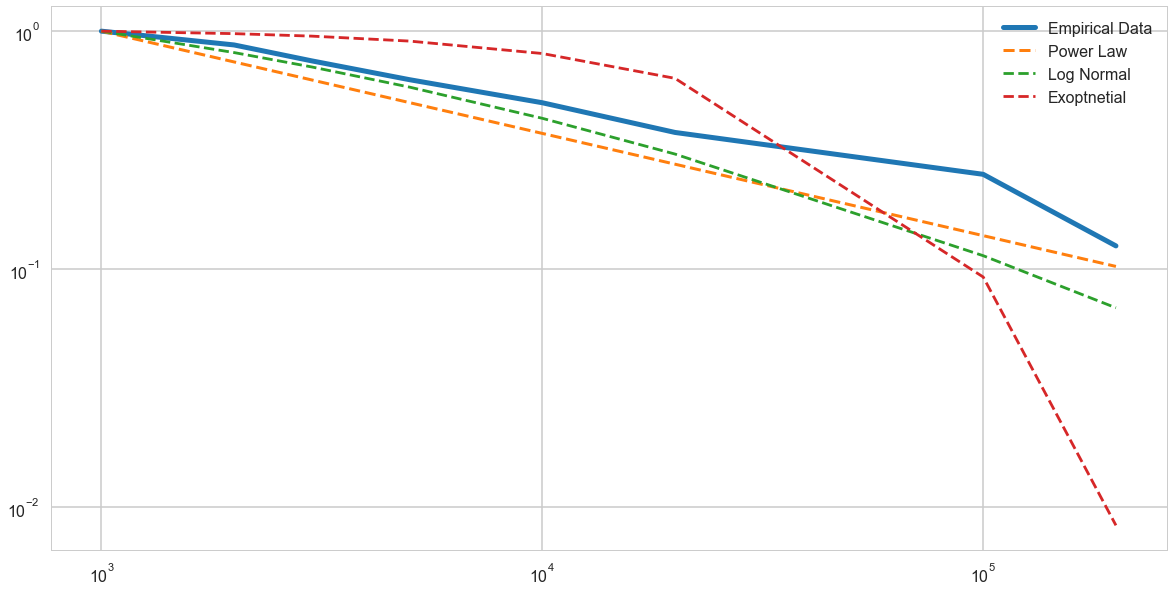

In [19]:
plt.figure(figsize=(20,10))

plt.style.use('default')
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-poster')

fig = fit.plot_ccdf(linestyle='-', linewidth=5, label='Empirical Data')

fit.power_law.plot_ccdf(ax=fig, linestyle='--', linewidth = 3, label="Power Law");

fit.lognormal.plot_ccdf(ax=fig, linestyle='--', label="Log Normal");

fit.exponential.plot_ccdf(ax=fig, linestyle='--', label="Exoptnetial");

plt.legend();

In [20]:
#df_scale['Training Data Size']
df_scale

,Training Data Size,Test Set Accuracy,Algo
0,100,0.69650,XGBoost_Classifier
1,200,0.73064,XGBoost_Classifier
2,300,0.73446,XGBoost_Classifier
3,1000,0.73780,XGBoost_Classifier
4,2000,0.73990,XGBoost_Classifier
5,3000,0.73990,XGBoost_Classifier
6,5000,0.74056,XGBoost_Classifier
7,10000,0.74084,XGBoost_Classifier
8,20000,0.73840,XGBoost_Classifier
9,100000,0.73800,XGBoost_Classifier


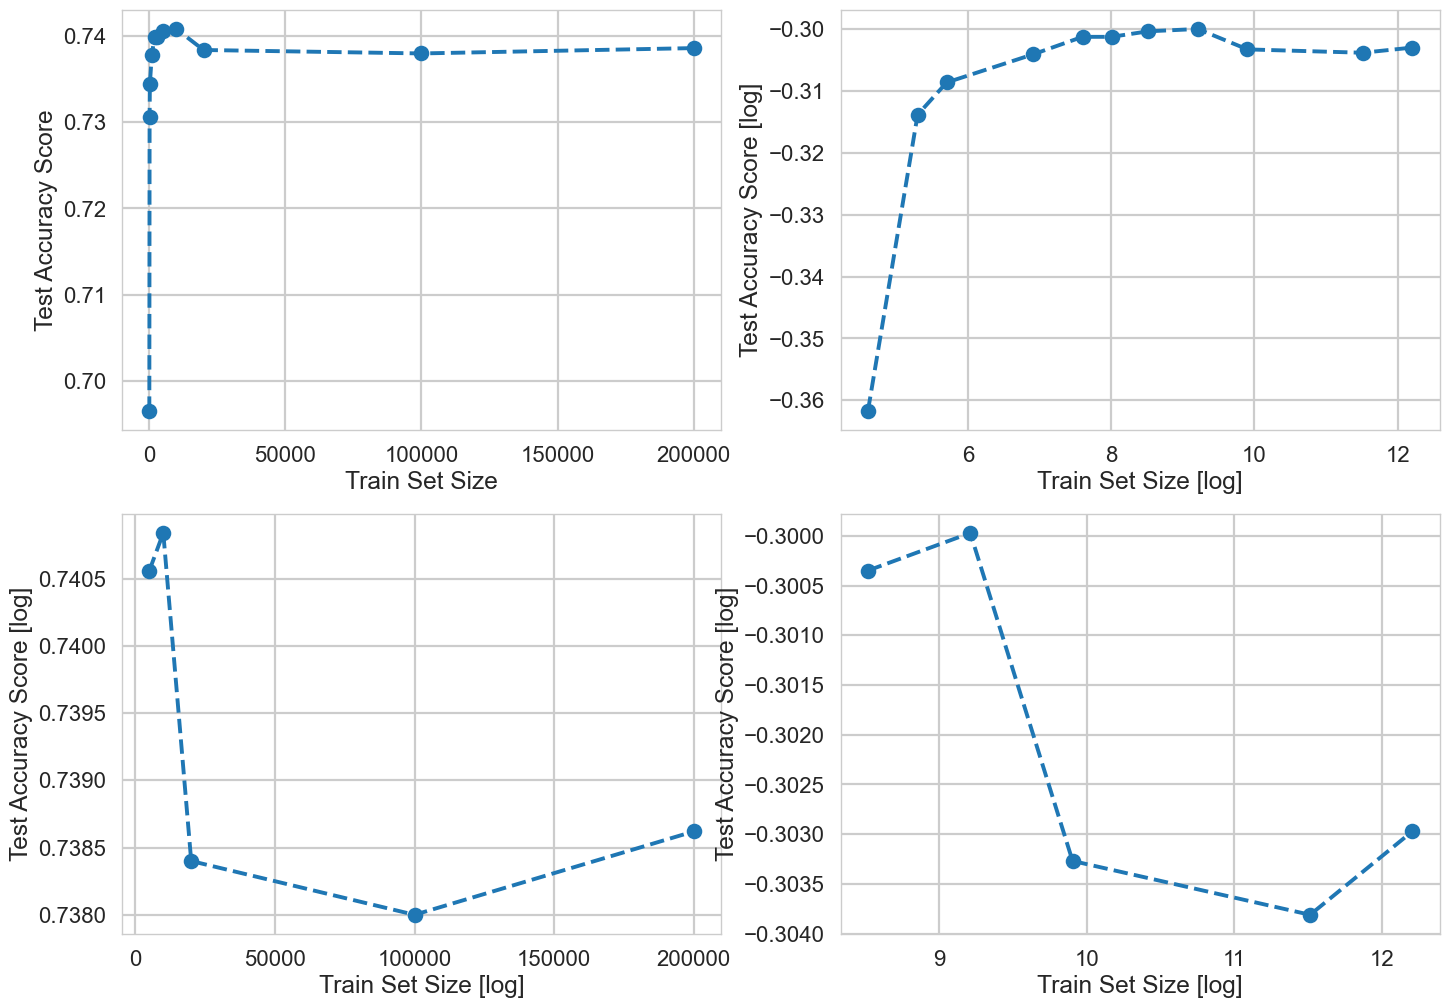

In [21]:
plt.figure(figsize=(17,12))

#ls_train_size = [100,200,300,3000, 5000, 10000, 100000, 200000]
#ls_test_score = [0.7654,  0.77584, 0.7791, 0.8169, 0.82078, 0.8246, 0.8355, 0.84102]

#ls_train_size = [3000, 10000, 100000, 200000]
#ls_test_score = [00.8169, 0.8246, 0.8355, 0.84102]

plt.subplot(2,2,1)
plt.plot(df_scale['Training Data Size'], df_scale['Test Set Accuracy'], 'o--')
plt.xlabel('Train Set Size')
plt.ylabel('Test Accuracy Score')

plt.subplot(2,2,2)
plt.plot(np.log(df_scale['Training Data Size']), np.log(df_scale['Test Set Accuracy']), 'o--')
plt.xlabel('Train Set Size [log]')
plt.ylabel('Test Accuracy Score [log]')

plt.subplot(2,2,3)
plt.plot(df_scale['Training Data Size'][-5:], df_scale['Test Set Accuracy'][-5:], 'o--')
plt.xlabel('Train Set Size [log]')
plt.ylabel('Test Accuracy Score [log]')

plt.subplot(2,2,4)
plt.plot(np.log(df_scale['Training Data Size'][-5:]), np.log(df_scale['Test Set Accuracy'][-5:]), 'o--')
plt.xlabel('Train Set Size [log]')
plt.ylabel('Test Accuracy Score [log]');

In [ ]:
#from numpy import genfromtxt
#blackouts = genfromtxt('blackouts.txt')

In [22]:
R, p = fit.distribution_compare('power_law', 'lognormal') # R: -0.1854134688515039, p = 0.7331821836765611

print(R, p)

-0.3949200606587704 0.5739668484266183


In [23]:
R, p = fit.distribution_compare('power_law', 'exponential') # R: -0.1854134688515039, p = 0.7331821836765611

print(R, p)

4.473933391541503 0.23965077685441416


https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0085777&type=printable    

R is the loglikelihood ratio between the two candidate
distributions.      

This number will be positive if the data is more
likely in the first distribution, and negative if the data is more likely
in the second distribution.      

The significance value for that direction
is p. The normalized_ratio option normalizes R by its standard
deviation, $R/(\sigma\sqrt(n))$. The normalized ratio is what is directly used
to calculate p.